In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,hour_of_day,method,duration
0,13,control,117.969829
1,15,control,106.665437
2,9,new,97.036785
3,13,control,107.906207
4,3,new,70.665614


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

(20.0, 140.0)

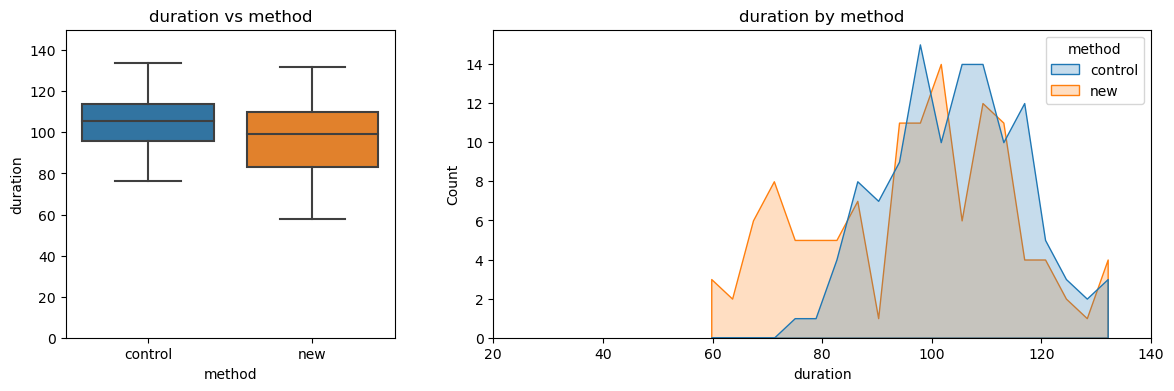

In [5]:
figure, axis = plt.subplots(1, 2, figsize=(14,4), width_ratios=[1,2])

sns.boxplot(x=df['method'], y=df['duration'], ax=axis[0])
axis[0].set_title('duration vs method')
axis[0].set_ylim(ymin=0, ymax=150)

sns.histplot(x=df['duration'], hue=df['method'], element='poly', bins=20, ax=axis[1])
axis[1].set_title('duration by method')
axis[1].set_xlim(xmin=20, xmax=140)

In [6]:
from statsmodels.formula.api import ols

In [7]:
lr = ols(formula='duration ~ hour_of_day + method + hour_of_day*method', data=df)

In [8]:
lr_result = lr.fit()

In [9]:
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     21.86
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           1.58e-12
Time:                        17:41:25   Log-Likelihood:                -978.66
No. Observations:                 240   AIC:                             1965.
Df Residuals:                     236   BIC:                             1979.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [10]:
from sklearn import preprocessing

In [11]:
label_encoder = preprocessing.LabelEncoder()

In [12]:
df['method'] = label_encoder.fit_transform(df['method'])

In [13]:
df.head()

,hour_of_day,method,duration
0,13,0,117.969829
1,15,0,106.665437
2,9,1,97.036785
3,13,0,107.906207
4,3,1,70.665614


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [15]:
linkage_data = linkage(df, method='ward', metric='euclidean')

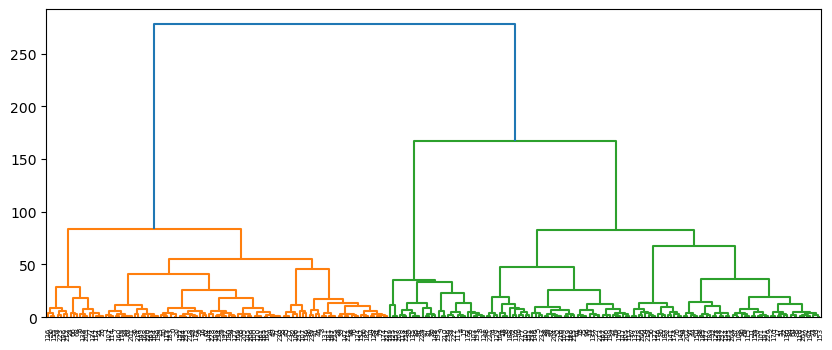

In [16]:
figure, axis = plt.subplots(figsize=(10,4))
dendrogram(linkage_data)
plt.show()

In [17]:
cluster_labels = cut_tree(linkage_data, n_clusters=2).reshape(-1,1)

In [18]:
df['cluster'] = pd.DataFrame(cluster_labels)

In [19]:
df.head()

,hour_of_day,method,duration,cluster
0,13,0,117.969829,0
1,15,0,106.665437,0
2,9,1,97.036785,1
3,13,0,107.906207,0
4,3,1,70.665614,1


(0.0, 25.0)

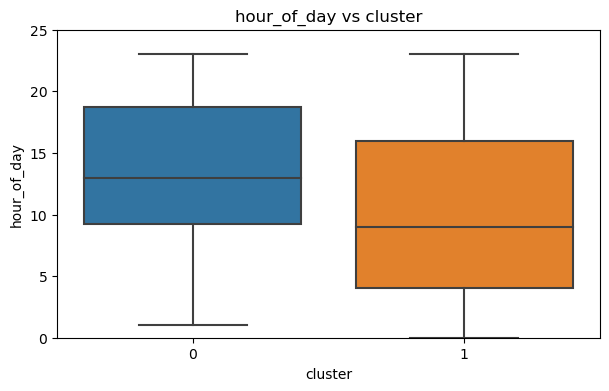

In [20]:
figure, axis = plt.subplots(figsize=(7,4))

sns.boxplot(x=df['cluster'], y=df['hour_of_day'])
axis.set_title('hour_of_day vs cluster')
axis.set_ylim(0, 25)

(0.0, 160.0)

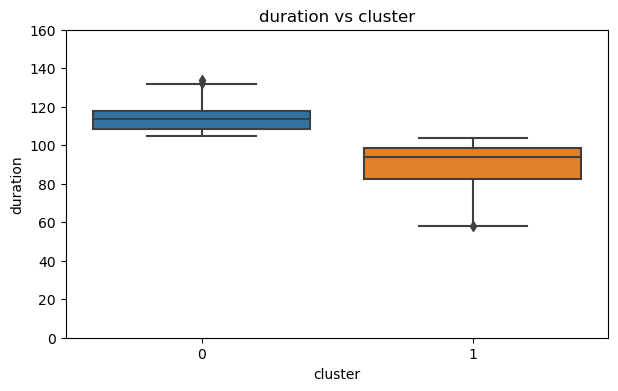

In [21]:
figure, axis = plt.subplots(figsize=(7,4))

sns.boxplot(x=df['cluster'], y=df['duration'])
axis.set_title('duration vs cluster')
axis.set_ylim(0, 160)

In [22]:
df1 = pd.pivot_table(df, index=['cluster','method'], values='hour_of_day', aggfunc='count').reset_index().rename_axis(None, axis=1).rename(columns={'hour_of_day':'count'})
df1

,cluster,method,count
0,0,0,63
1,0,1,43
2,1,0,55
3,1,1,79


(0.0, 100.0)

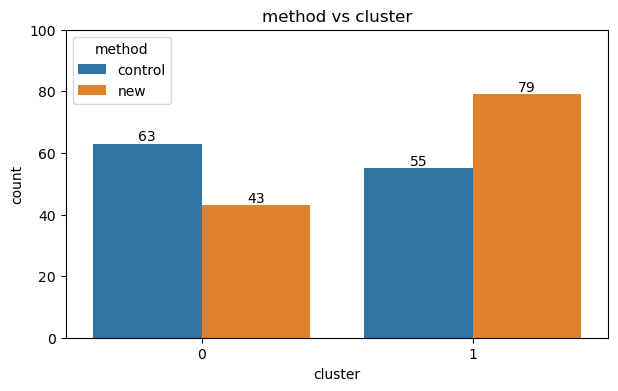

In [23]:
figure, axis = plt.subplots(figsize=(7,4))

sns.barplot(x=df1['cluster'], y=df1['count'], hue=df1['method'].replace({0: 'control', 1: 'new'}))
for i in axis.containers:
    axis.bar_label(i,)
axis.set_title('method vs cluster')
axis.set_ylim(0, 100)

In [24]:
standard_scaler = preprocessing.StandardScaler()

In [25]:
df2 = standard_scaler.fit_transform(df.drop(['cluster'], axis=1))

In [26]:
df2 = pd.DataFrame(df2, columns=df.drop(['cluster'], axis=1).columns)

In [27]:
df2.head()

,hour_of_day,method,duration
0,0.221520,-1.016808,1.103255
1,0.528831,-1.016808,0.402929
2,-0.393102,0.983470,-0.193582
3,0.221520,-1.016808,0.479797
4,-1.315035,0.983470,-1.827321


In [28]:
linkage_data = linkage(df2, method='ward', metric='euclidean')

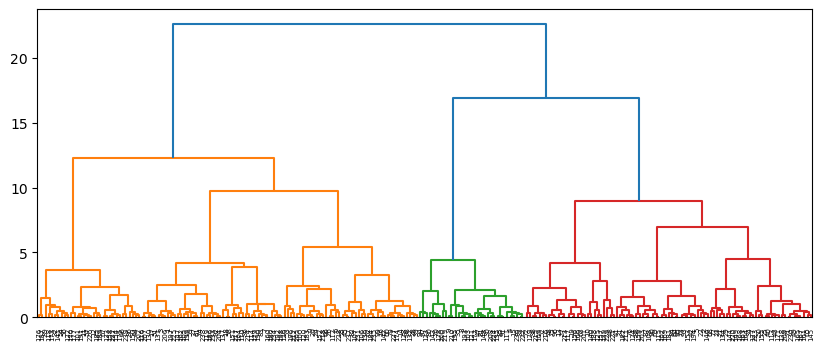

In [29]:
figure, axis = plt.subplots(figsize=(10,4))
dendrogram(linkage_data)
plt.show()

(0.0, 120.0)

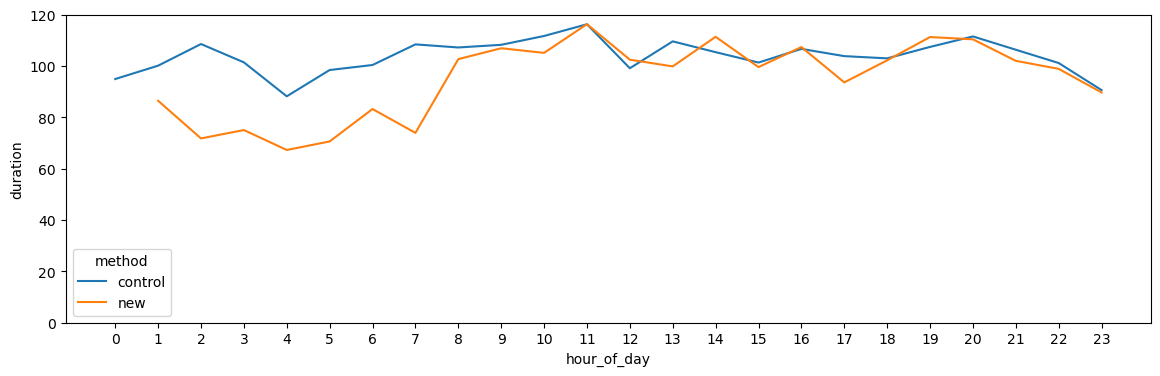

In [30]:
import numpy as np

figure, axis = plt.subplots(figsize=(14,4))

sns.lineplot(x=df['hour_of_day'], y=df['duration'], hue=df['method'].replace({0: 'control', 1: 'new'}), ax=axis, estimator=np.median, errorbar=None)
axis.set_xticks(np.arange(0,24,1))
axis.set_xticklabels(df.sort_values(by="hour_of_day")['hour_of_day'].unique())
axis.set_ylim(0, 120)

In [31]:
df['period'] = df.apply(lambda x: '00-07' if x['hour_of_day'] <= 7 else '08-00', axis=1)

In [32]:
df.head()

,hour_of_day,method,duration,cluster,period
0,13,0,117.969829,0,08-00
1,15,0,106.665437,0,08-00
2,9,1,97.036785,1,08-00
3,13,0,107.906207,0,08-00
4,3,1,70.665614,1,00-07


(0.0, 200.0)

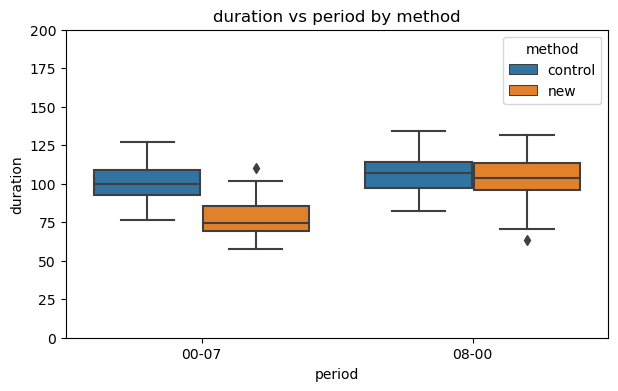

In [33]:
figure, axis = plt.subplots(figsize=(7,4))

sns.boxplot(x=df['period'], y=df['duration'], hue=df['method'].replace({0: 'control', 1: 'new'}), order=['00-07', '08-00'])
axis.set_title('duration vs period by method')
axis.set_ylim(0, 200)

In [34]:
df['method'] = df['method'].replace({0: 'control', 1: 'new'})

In [35]:
lr = ols(formula='duration ~ period + method + period*method', data=df)

In [36]:
lr_result = lr.fit()

In [37]:
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     43.13
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           2.93e-22
Time:                        17:43:04   Log-Likelihood:                -955.63
No. Observations:                 240   AIC:                             1919.
Df Residuals:                     236   BIC:                             1933.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     